### Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Load history

In [2]:
df = pd.read_csv("/Volumes/hd_4tb/results/history.csv")

### Plot rolling average

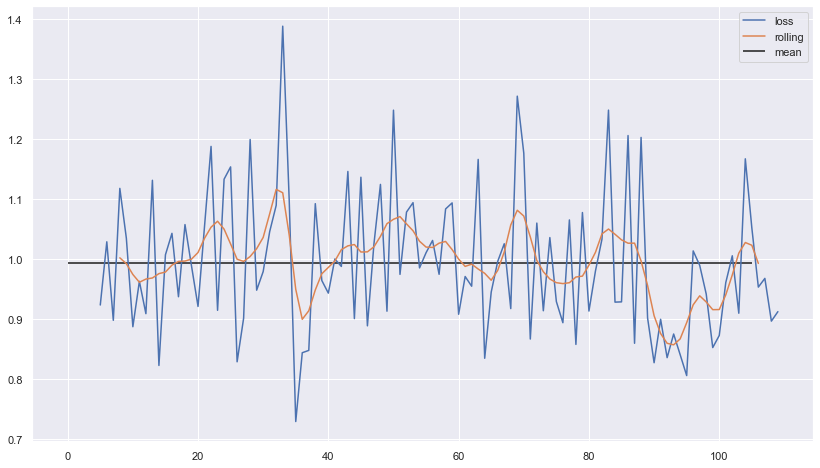

In [3]:
window_size = 3
x = df.loss.iloc[5:] # The first few ones are a bit shakey

plt.figure(figsize=(14, 8))
plt.plot(x, label="loss")
rolling = x.rolling(window_size, center=True).mean()
rolling = rolling.rolling(window_size, center=True).mean()
rolling = rolling.rolling(window_size, center=True).mean()
plt.plot(rolling, label="rolling")
plt.hlines(np.mean(x), 0, len(x), label="mean")
plt.legend();

### Batch movement

It might be more helpful to see if training helps within a subject/task

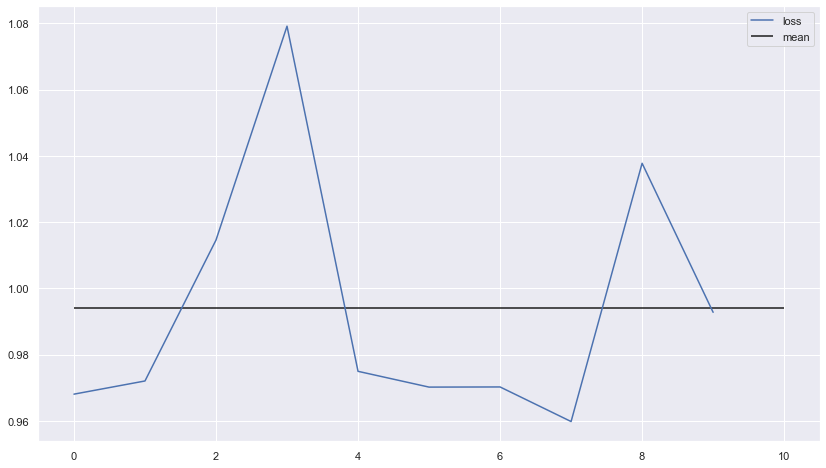

In [4]:
batch_size = 10
loss = df.loss.iloc[batch_size:] # Skip first batch
N = len(loss) // batch_size
loss = loss.iloc[:N * batch_size]
runs = np.array_split(loss.values, N)

x = np.mean(runs, axis=0)

plt.figure(figsize=(14, 8))
plt.plot(x, label="loss")
plt.hlines(np.mean(x), 0, len(x), label="mean")
plt.legend();